
# 🔬 Analyse et Modélisation Prédictive du Risque Cardiovasculaire

Ce notebook présente une approche complète de modélisation prédictive pour la variable `Risk` (événement cardiovasculaire). Il inclut : exploration, nettoyage, visualisations, modélisation et pistes d'amélioration.


Importing the libraries

**Nom de la variable	Description**
* index	Identifiant unique de chaque individu (index du dataset)
* male	Sexe de l’individu (1 = homme, 0 = femme)
* age	Âge de la personne (en années)
* currentSmoker	Fumeur actuel (1 = oui, 0 = non)
* cigsPerDay	Nombre moyen de cigarettes fumées par jour
* BPMeds	Médication pour la pression artérielle (1 = oui, 0 = non)
* diabetes	Diabète diagnostiqué (1 = oui, 0 = non)
* totChol	Taux de cholestérol total (mg/dL)
* sysBP	Pression artérielle systolique (mmHg)
* diaBP	Pression artérielle diastolique (mmHg)
* BMI	Indice de masse corporelle (kg/m²)
* heartRate	Fréquence cardiaque (battements par minute)
* glucose	Taux de glucose dans le sang (mg/dL)
* Risk	Variable cible : risque d’événement cardiovasculaire (1 = oui, 0 = non)

In [22]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

Importing the Dataset

In [23]:
# loading the csv data to a Pandas DataFrame
data = pd.read_csv("/content/framingham.csv")

# 1. Exploration initiale des données

In [27]:
data.head()  # Afficher les premières lignes du dataset

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [28]:
data.describe()  # Statistiques descriptives

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005937,0.029615,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.310613
std,0.495027,8.572942,0.500024,11.881610,0.168481,0.158280,44.327521,22.033300,11.910394,4.070687,12.023929,22.831748,0.462799
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,1.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [29]:
data.info()  # Informations sur les types de données et les valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4240 non-null   int64  
 1   age            4240 non-null   int64  
 2   currentSmoker  4240 non-null   int64  
 3   cigsPerDay     4240 non-null   float64
 4   BPMeds         4240 non-null   float64
 5   diabetes       4240 non-null   int64  
 6   totChol        4240 non-null   float64
 7   sysBP          4240 non-null   float64
 8   diaBP          4240 non-null   float64
 9   BMI            4240 non-null   float64
 10  heartRate      4240 non-null   float64
 11  glucose        4240 non-null   float64
 12  Risk           4240 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 430.8 KB


# 2. Vérification et traitement des valeurs manquantes

In [30]:
data.isnull().sum()  # Compter les valeurs manquantes

,0
male,0
age,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
diabetes,0
totChol,0
sysBP,0
diaBP,0
BMI,0


In [31]:
data = data.fillna(data.mean())

# 3. EDA

In [33]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

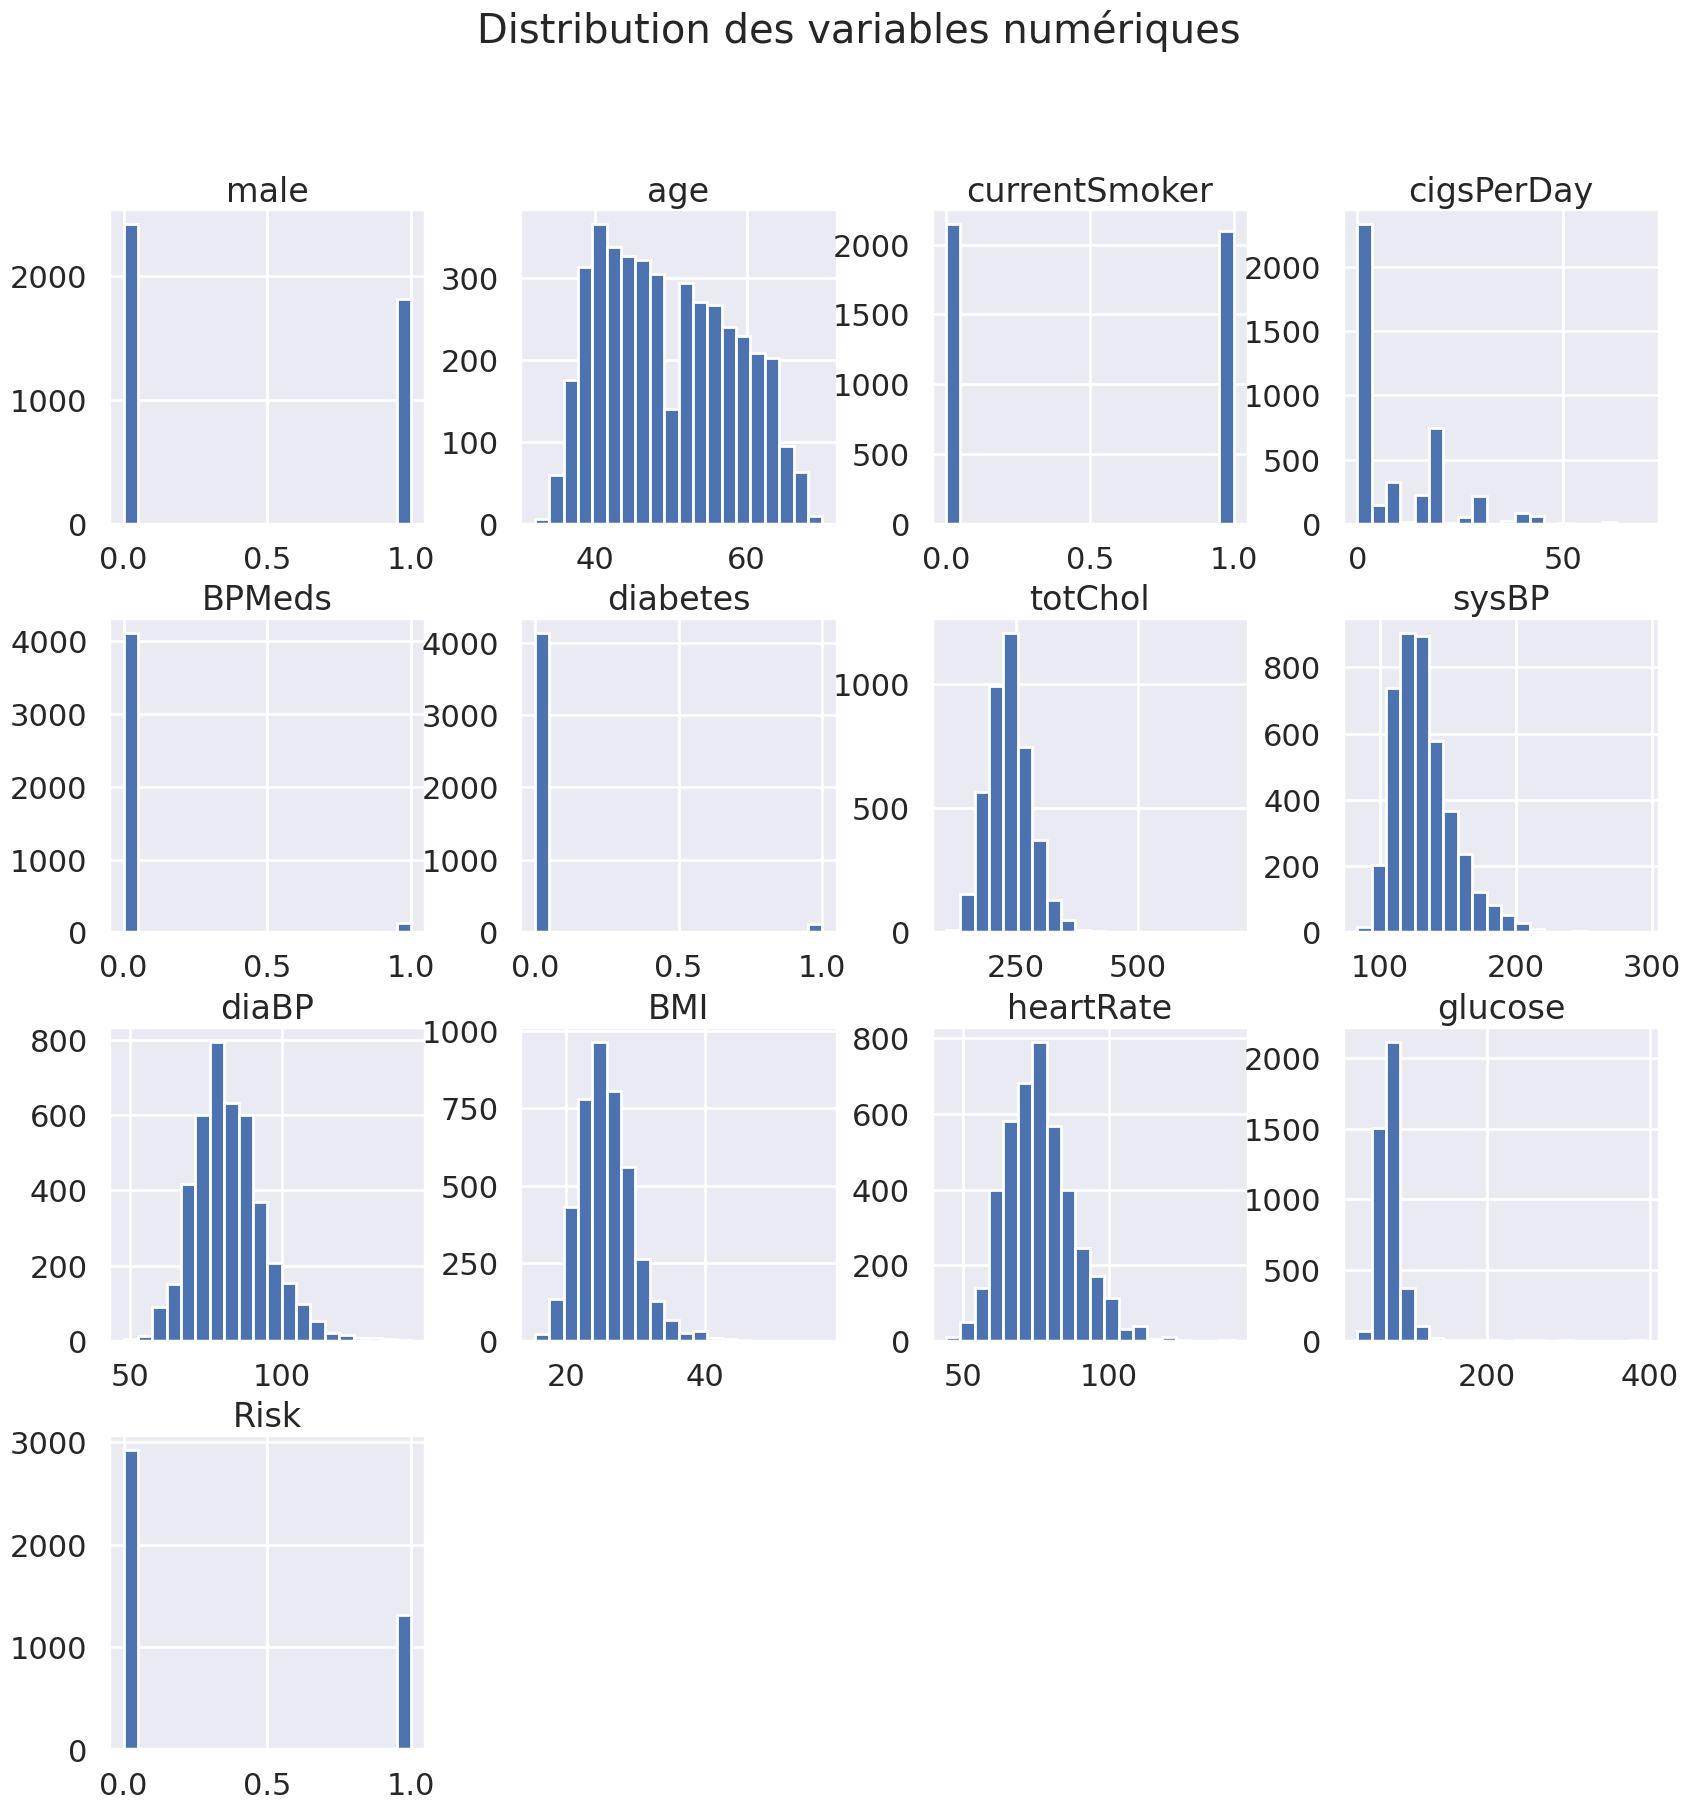

In [38]:
# 3. Visualisation de la distribution des variables numériques
# Histogrammes de toutes les variables numériques
data.hist(bins=20, figsize=(20, 20))
plt.suptitle("Distribution des variables numériques")
plt.show()

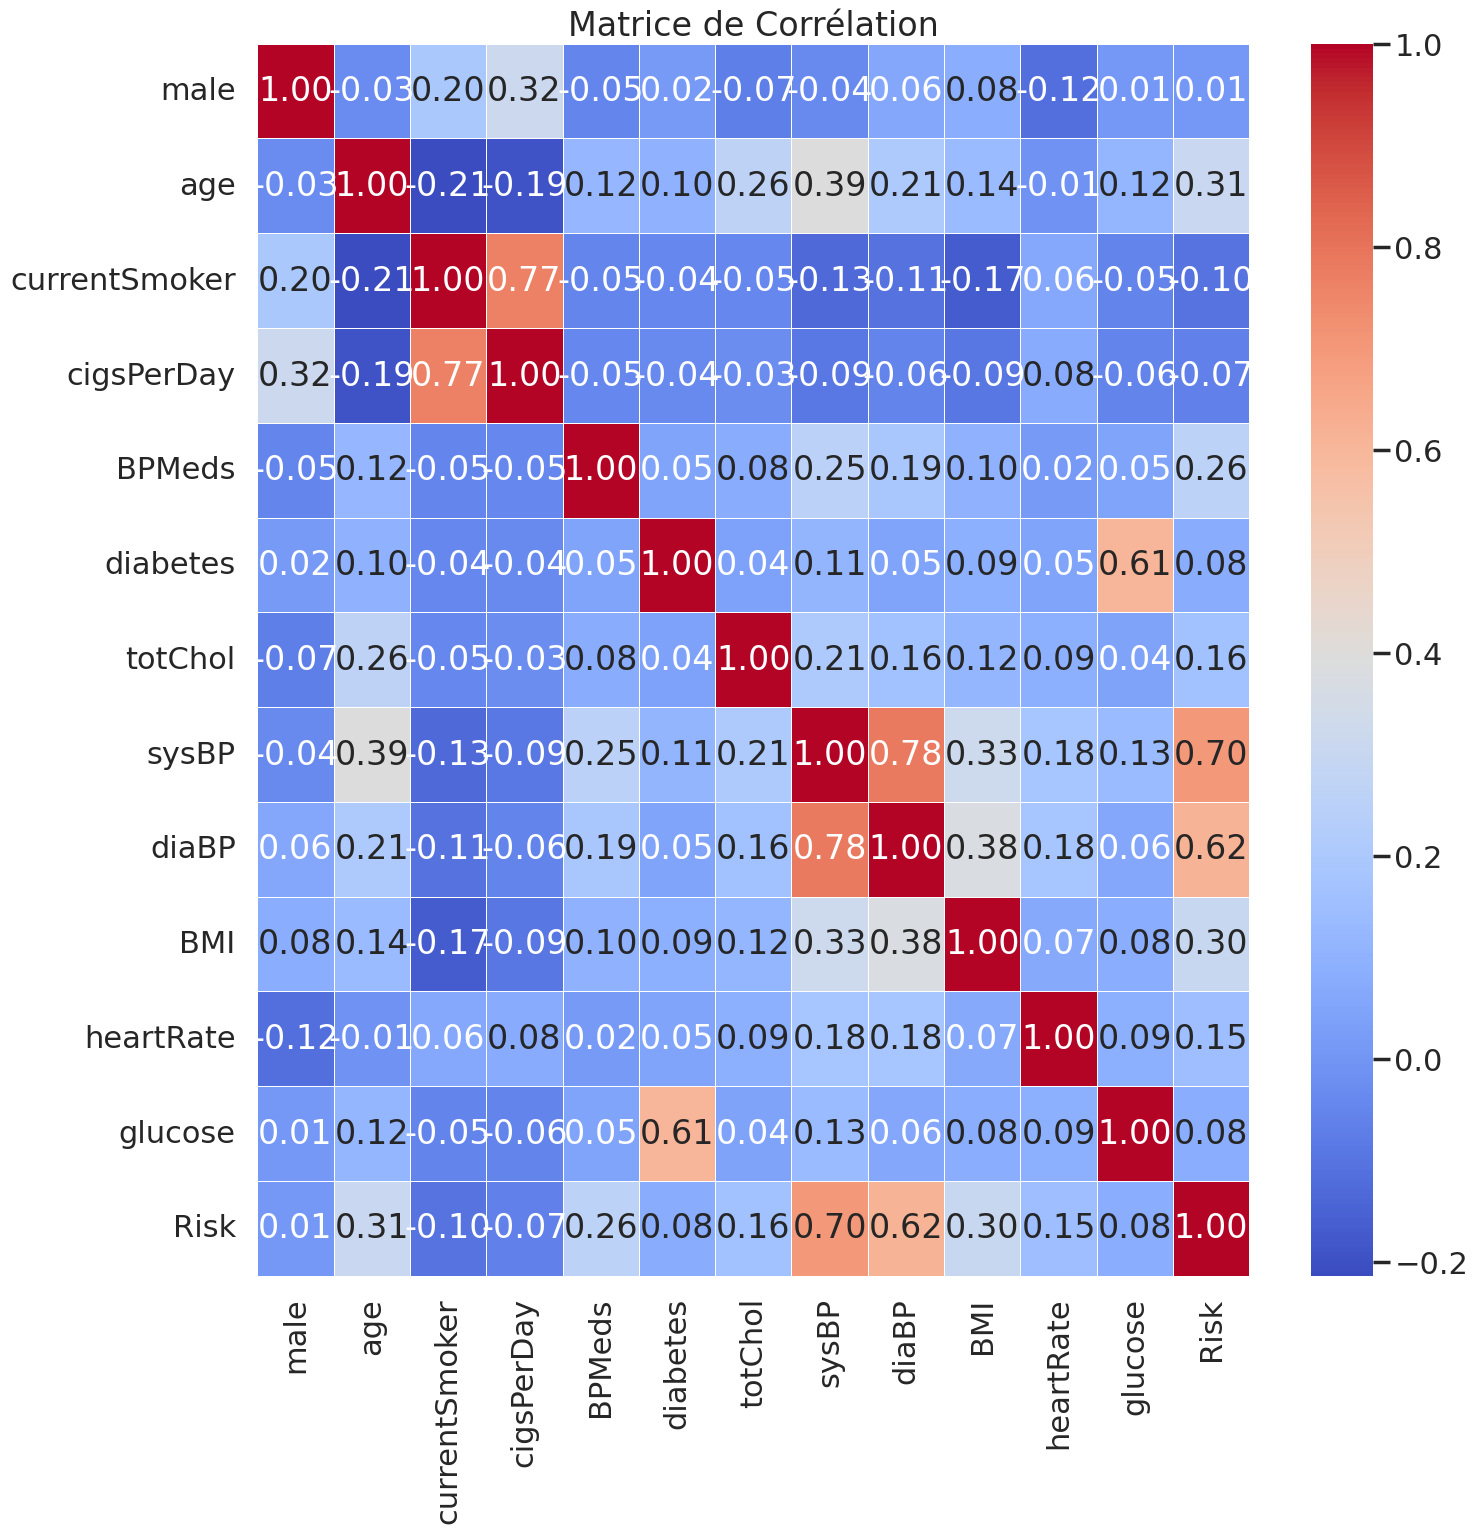

In [40]:

# 4. Visualisation de la corrélation entre les variables numériques
corr_matrix = data.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

<ipython-input-43-d34b46390fab>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Risk', data=data, palette='Set2')


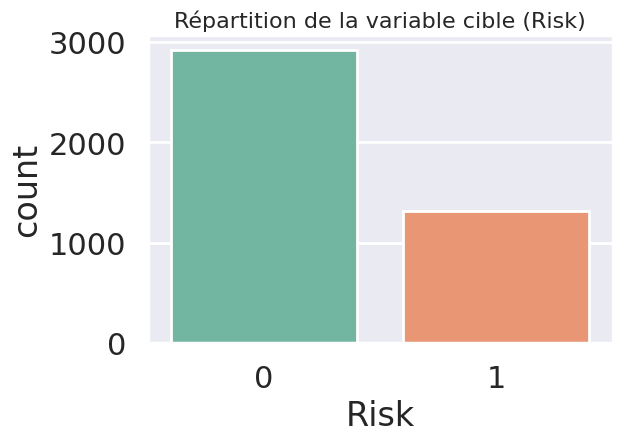

In [43]:
# 5. Visualisation de la répartition de la variable cible 'Risk'
plt.figure(figsize=(6, 4))
sns.countplot(x='Risk', data=data, palette='Set2')
plt.title("Répartition de la variable cible (Risk)", fontsize=16)
plt.show()

<ipython-input-44-7ed726f7fe17>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk', y='age', data=data, palette='Set2')


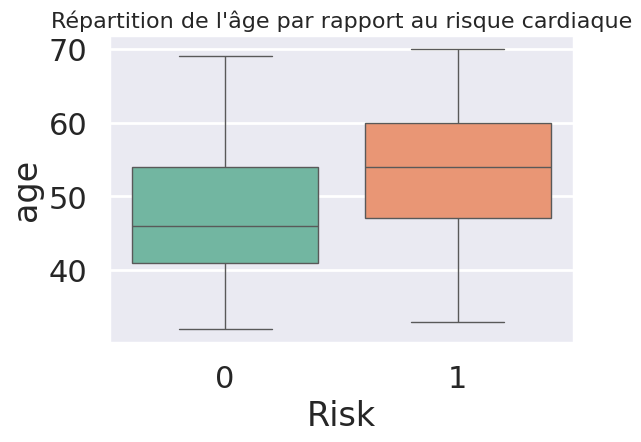

In [44]:
# 6. Analyse de la distribution de certaines variables par rapport à la variable cible 'Risk'
# Boxplot pour 'age' vs 'Risk'
plt.figure(figsize=(6, 4))
sns.boxplot(x='Risk', y='age', data=data, palette='Set2')
plt.title("Répartition de l'âge par rapport au risque cardiaque", fontsize=16)
plt.show()

<ipython-input-45-c0d2f8e2fe82>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk', y='totChol', data=data, palette='Set2')


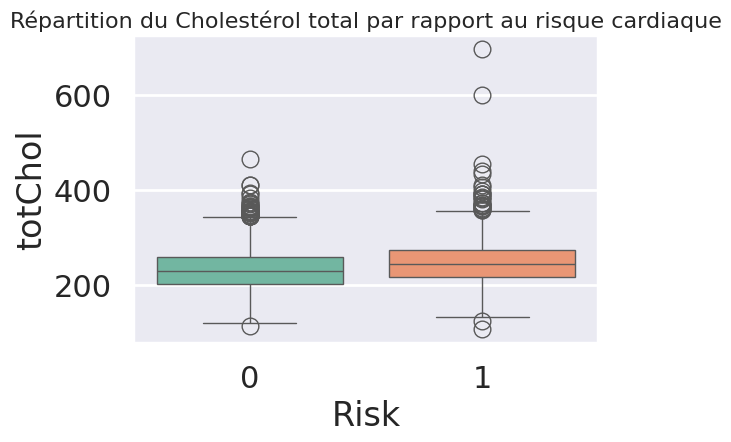

In [45]:
# Boxplot pour 'totChol' vs 'Risk'
plt.figure(figsize=(6, 4))
sns.boxplot(x='Risk', y='totChol', data=data, palette='Set2')
plt.title("Répartition du Cholestérol total par rapport au risque cardiaque", fontsize=16)
plt.show()

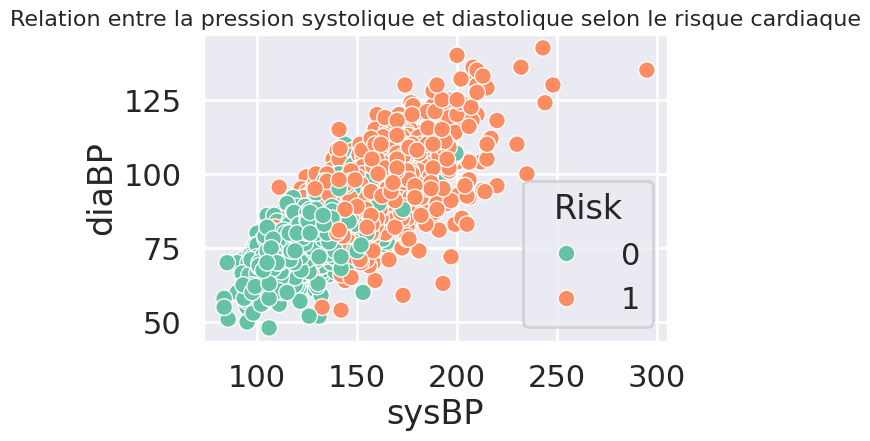

In [46]:

# 7. Visualisation des relations entre certaines variables
# Scatter plot entre 'sysBP' et 'diaBP'
plt.figure(figsize=(6, 4))
sns.scatterplot(x='sysBP', y='diaBP', hue='Risk', data=data, palette='Set2')
plt.title("Relation entre la pression systolique et diastolique selon le risque cardiaque", fontsize=16)
plt.show()


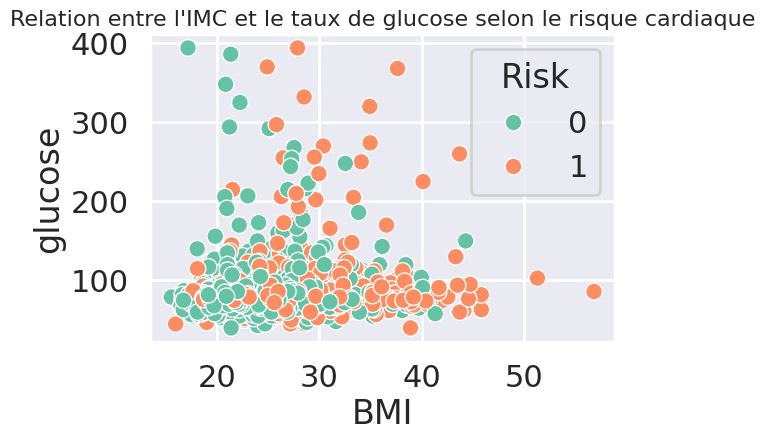

In [47]:

# Scatter plot entre 'BMI' et 'glucose'
plt.figure(figsize=(6, 4))
sns.scatterplot(x='BMI', y='glucose', hue='Risk', data=data, palette='Set2')
plt.title("Relation entre l'IMC et le taux de glucose selon le risque cardiaque", fontsize=16)
plt.show()

<ipython-input-48-e5ed89a29b30>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


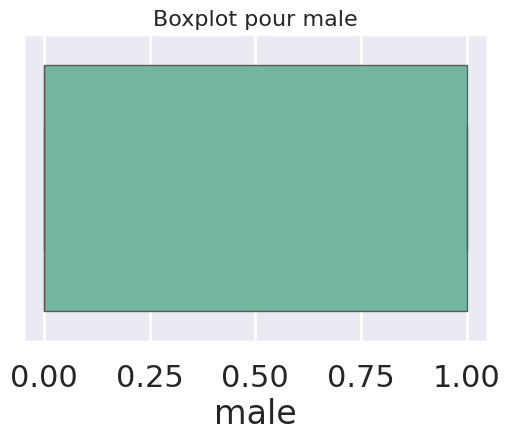

<ipython-input-48-e5ed89a29b30>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


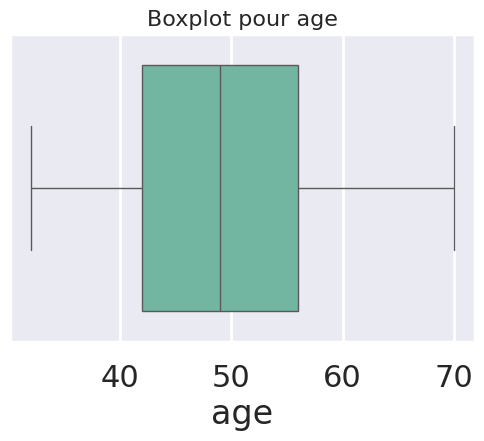

<ipython-input-48-e5ed89a29b30>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


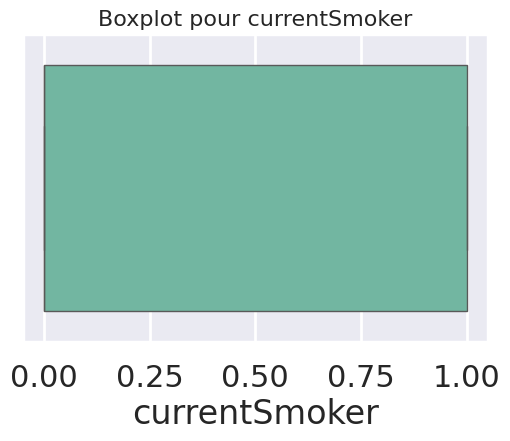

<ipython-input-48-e5ed89a29b30>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


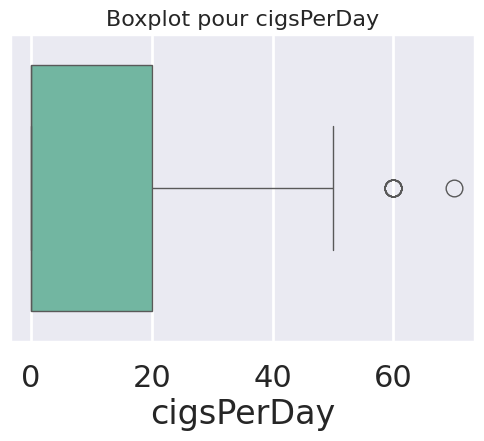

<ipython-input-48-e5ed89a29b30>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


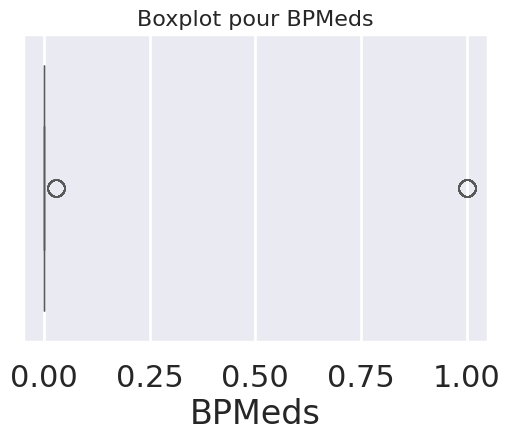

<ipython-input-48-e5ed89a29b30>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


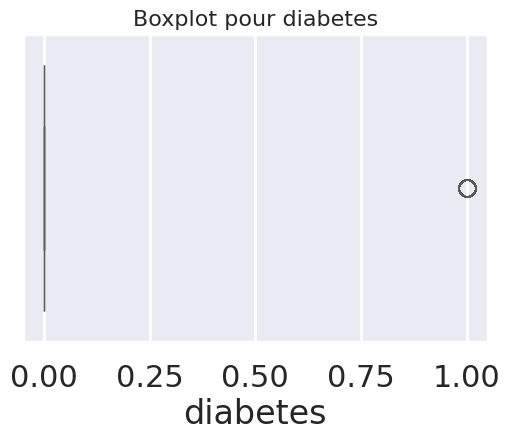

<ipython-input-48-e5ed89a29b30>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


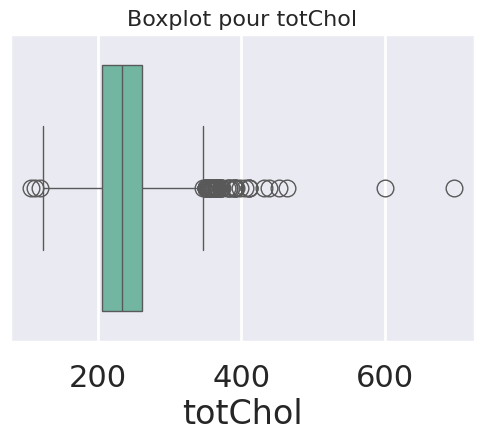

<ipython-input-48-e5ed89a29b30>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


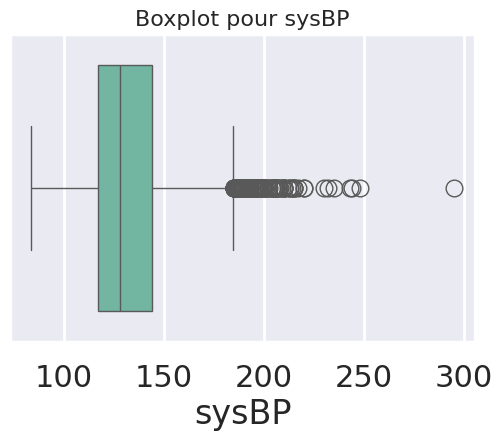

<ipython-input-48-e5ed89a29b30>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


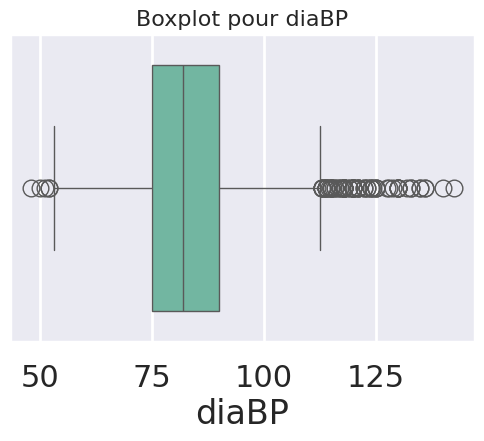

<ipython-input-48-e5ed89a29b30>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


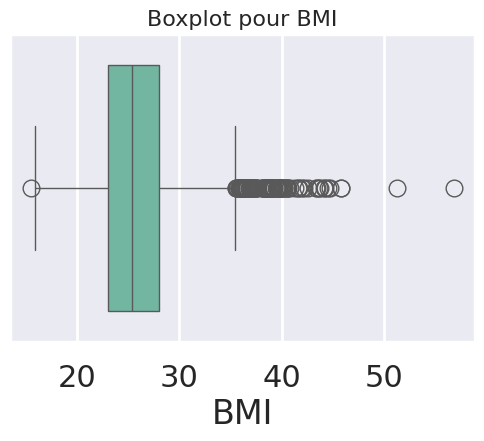

<ipython-input-48-e5ed89a29b30>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


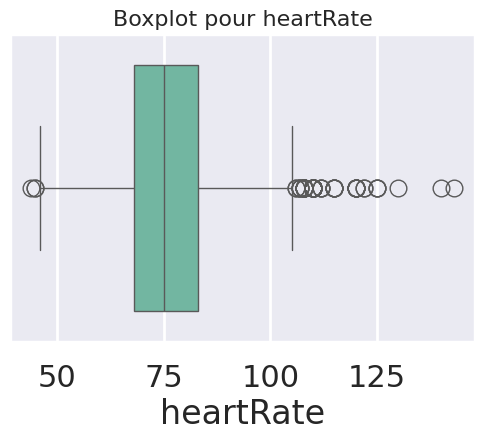

<ipython-input-48-e5ed89a29b30>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


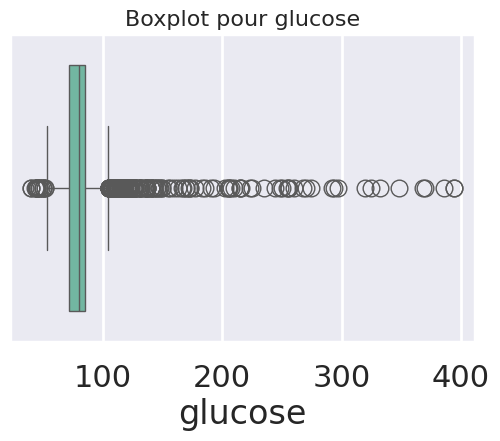

<ipython-input-48-e5ed89a29b30>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette='Set2')


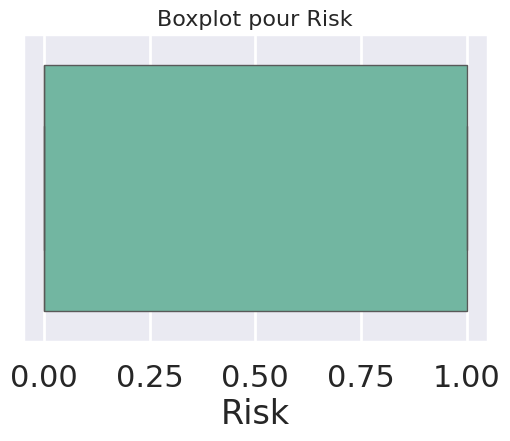

In [48]:

# 8. Vérification des valeurs aberrantes (outliers) pour les variables numériques
# Boxplot pour détecter les outliers
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col], palette='Set2')
    plt.title(f"Boxplot pour {col}", fontsize=16)
    plt.show()

<ipython-input-50-75aed7915ece>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


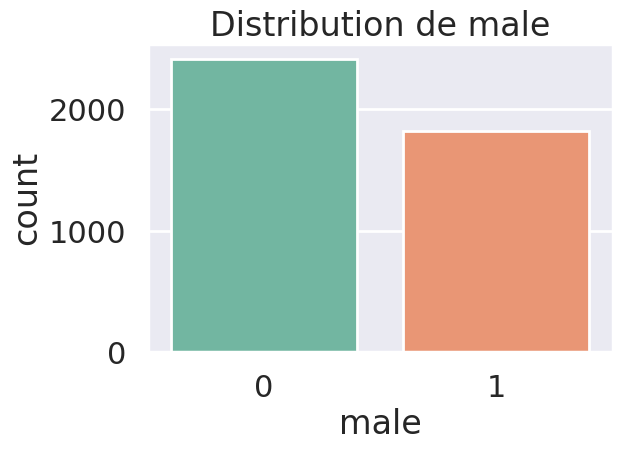

<ipython-input-50-75aed7915ece>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


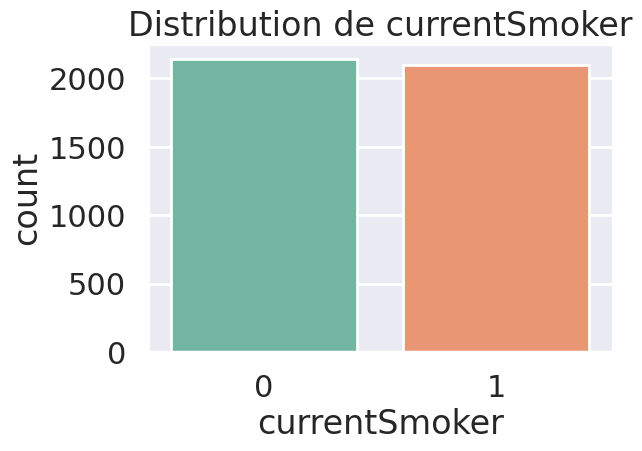

<ipython-input-50-75aed7915ece>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


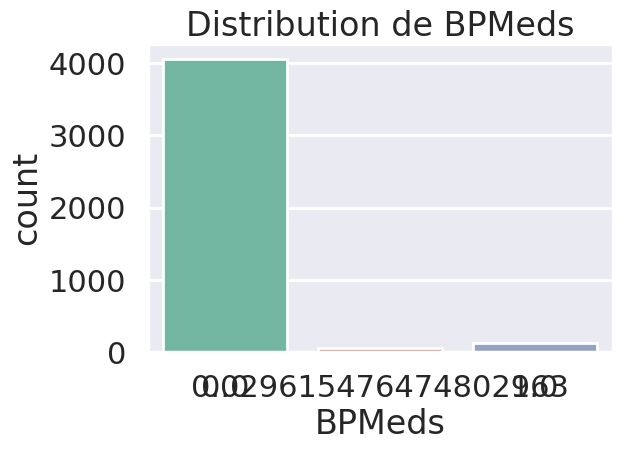

<ipython-input-50-75aed7915ece>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


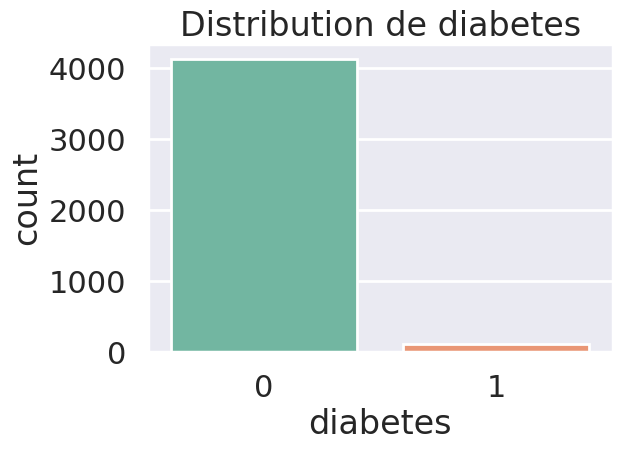

In [50]:

# 9. Distribution des variables binaires ('male', 'currentSmoker', 'BPMeds', 'diabetes')
binary_columns = ['male', 'currentSmoker', 'BPMeds', 'diabetes']
for col in binary_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data, palette='Set2')
    plt.title(f"Distribution de {col}")
    plt.show()

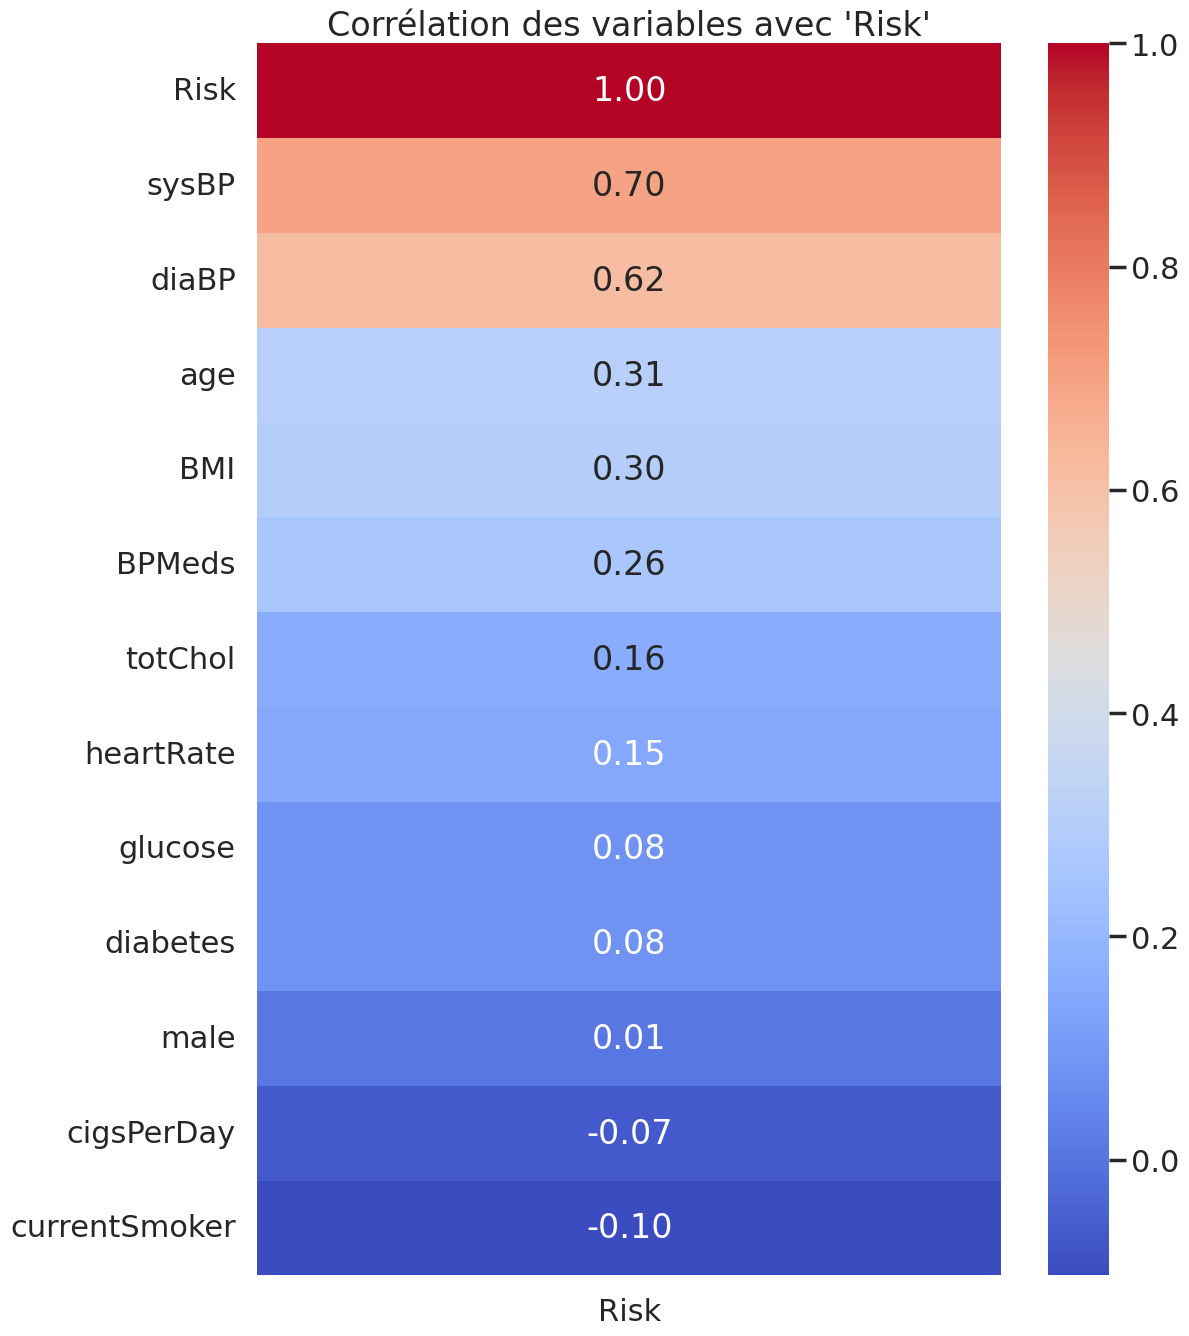

In [53]:

# 10. Visualisation des corrélations avec la variable cible 'Risk'
plt.figure(figsize=(12, 16))
sns.heatmap(data.corr()[['Risk']].sort_values(by='Risk', ascending=False), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation des variables avec 'Risk'")
plt.show()

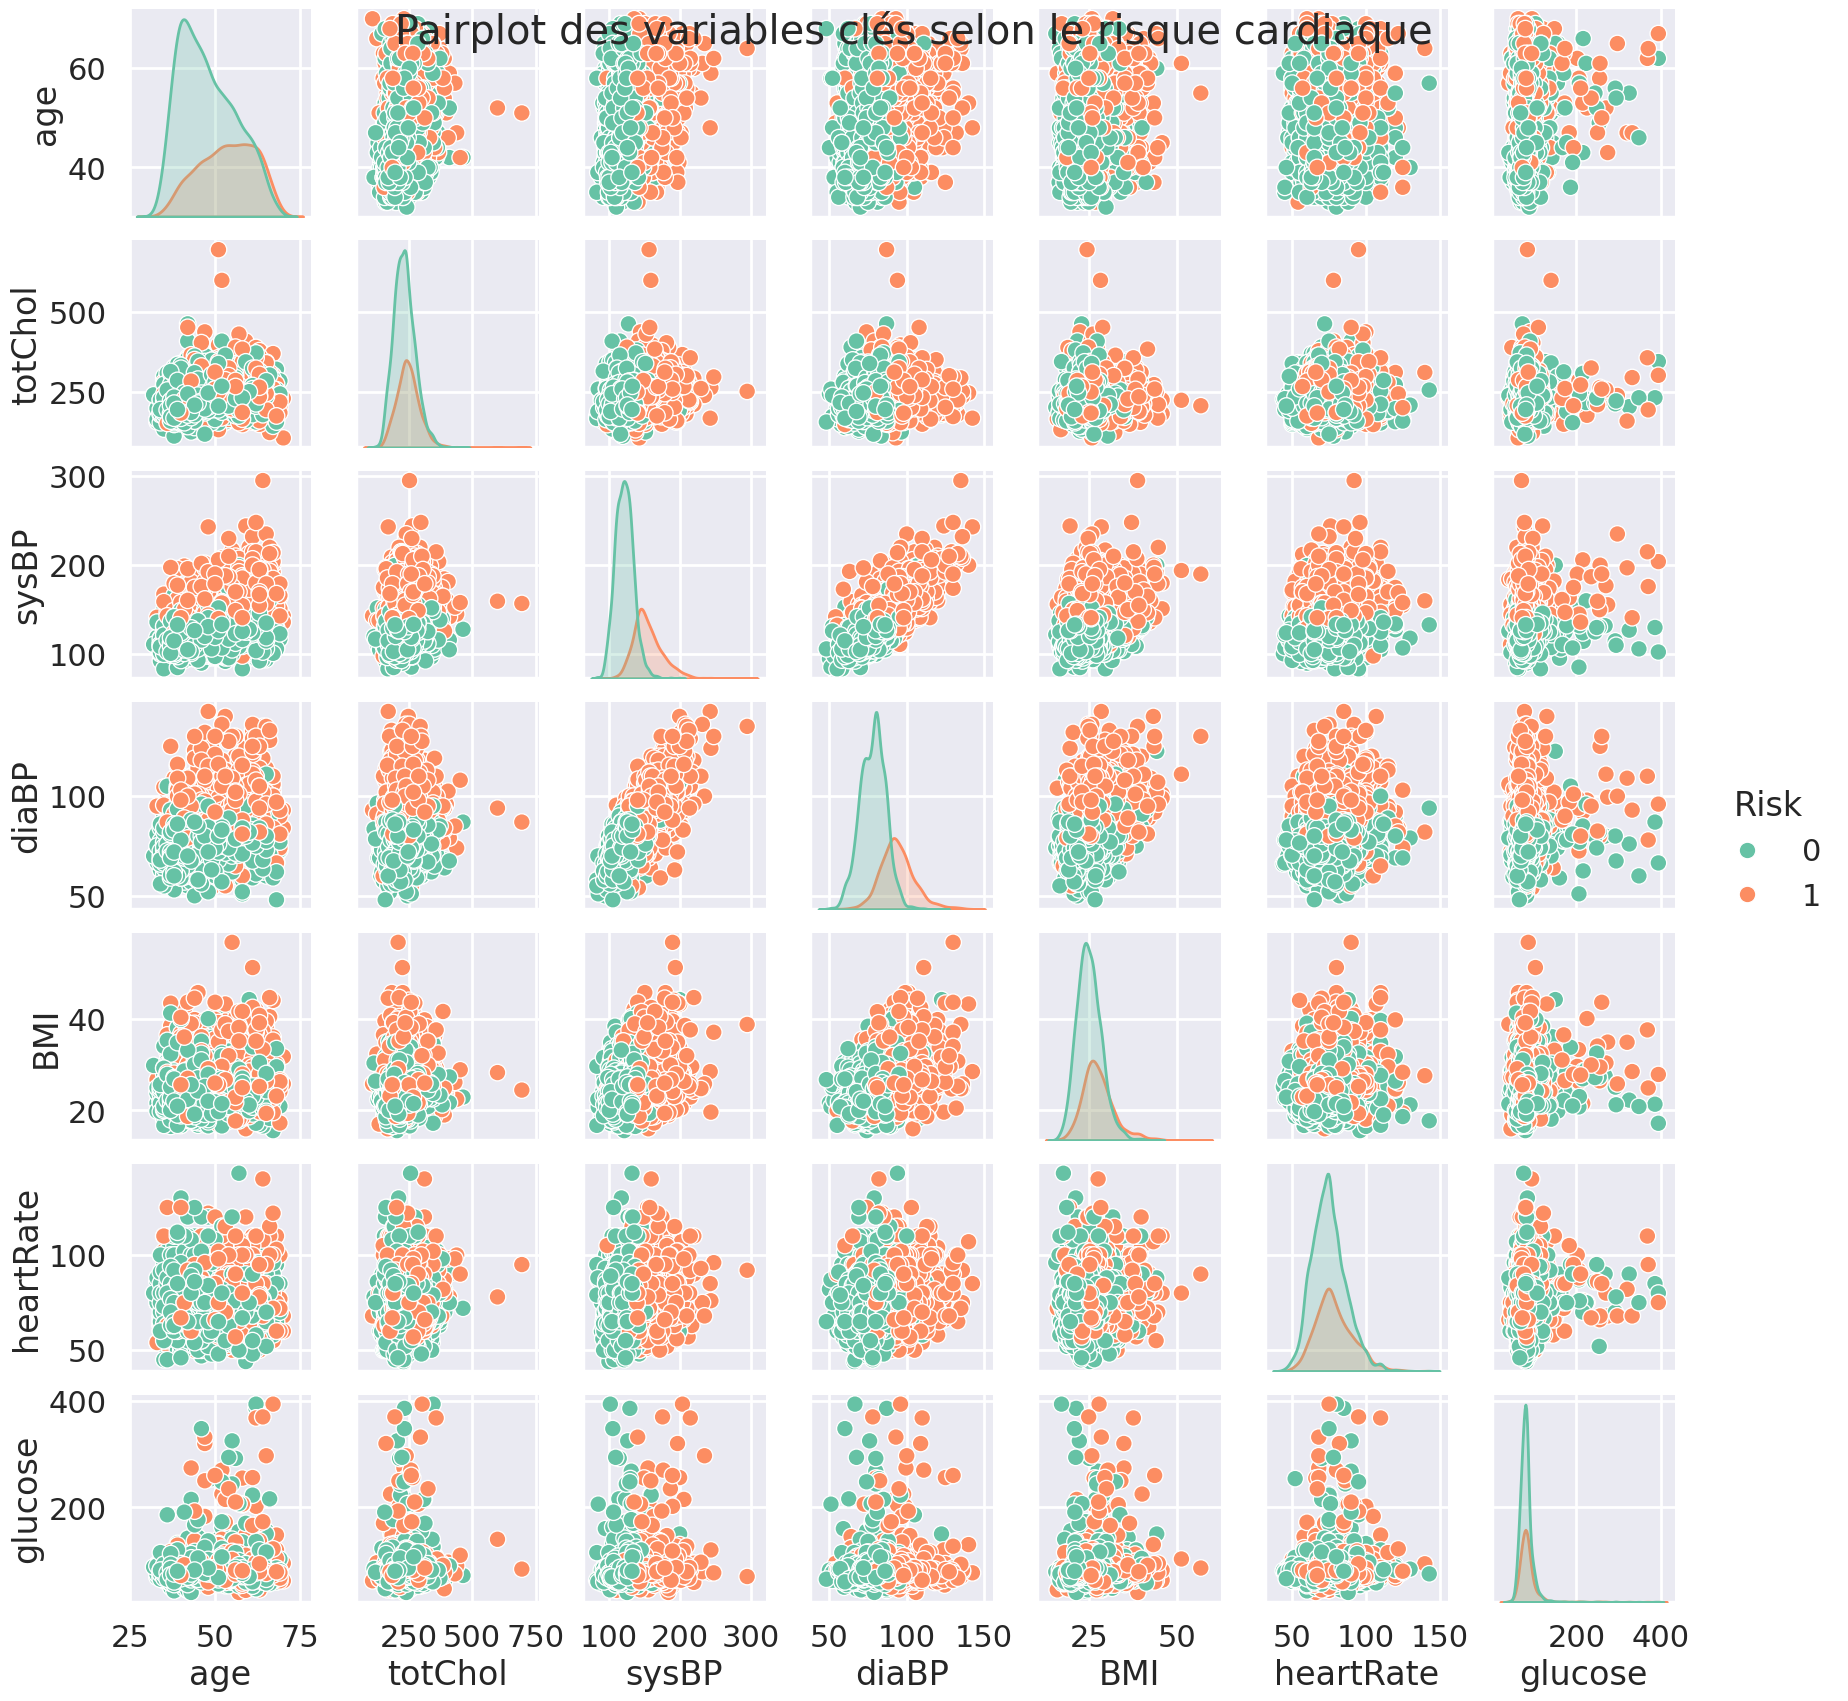

In [54]:
# 11. Pairplot pour les variables clés
sns.pairplot(data[['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'Risk']], hue='Risk', palette='Set2')
plt.suptitle("Pairplot des variables clés selon le risque cardiaque")
plt.show()

In [55]:
# Importation des bibliothèques nécessaires
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.utils import resample
from scipy import stats

In [56]:
# 2. Séparation des variables prédictives (X) et de la variable cible (y)
X = data.drop('Risk', axis=1)  # Variables prédictives
y = data['Risk']  # Variable cible


In [57]:

# 3. Prétraitement des données : Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalisation des variables prédictives

# 4. Séparation du jeu de données en ensembles d'entraînement et de test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [58]:
# 5. Construction du modèle
# Ici, nous allons utiliser un classificateur Random Forest pour démonstration

model = RandomForestClassifier(n_estimators=100, random_state=42)


In [59]:
# Entraînement du modèle
model.fit(X_train, y_train)

# 6. Évaluation du modèle
y_pred = model.predict(X_test)

# Précision du modèle
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.902122641509434


In [60]:

# Rapport de classification
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       595
           1       0.80      0.89      0.84       253

    accuracy                           0.90       848
   macro avg       0.88      0.90      0.89       848
weighted avg       0.91      0.90      0.90       848



In [61]:
# Matrice de confusion
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[540  55]
 [ 28 225]]


In [62]:

# 7. Fine-tuning des hyperparamètres
# Utilisation de GridSearchCV pour optimiser les hyperparamètres du modèle
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [63]:
# Meilleurs hyperparamètres trouvés par GridSearchCV
print(f"\nBest Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [66]:
model = grid_search.best_estimator_
model

RandomForestClassifier(min_samples_split=5, n_estimators=50, random_state=42)

In [67]:
# 6. Évaluation du modèle
y_pred = model.predict(X_test)

# Précision du modèle
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.8985849056603774


In [68]:
# 8. Calcul de l'intervalle de confiance pour l'accuracy (utilisation du bootstrap)
n_iterations = 1000
accuracy_scores = []
for _ in range(n_iterations):
    # Créer un échantillon bootstrap
    X_resampled, y_resampled = resample(X_train, y_train)

    # Entraînement du modèle sur l'échantillon bootstrap
    model.fit(X_resampled, y_resampled)

    # Prédictions sur le test
    y_pred_resampled = model.predict(X_test)

    # Calcul de l'accuracy pour chaque échantillon bootstrap
    accuracy_scores.append(accuracy_score(y_test, y_pred_resampled))

# Calculer l'intervalle de confiance à 95%
conf_interval = np.percentile(accuracy_scores, [2.5, 97.5])
print(f"\n95% Confidence Interval for Accuracy: {conf_interval}")


95% Confidence Interval for Accuracy: [0.89030071 0.90804835]


In [69]:
import joblib

# Sauvegarder le modèle dans un fichier
joblib.dump(model, 'modele_random_forest.pkl')

# Sauvegarder aussi le scaler si nécessaire
joblib.dump(scaler, 'scaler.pkl')

print("Le modèle et le scaler ont été enregistrés avec succès.")

Le modèle et le scaler ont été enregistrés avec succès.
